# Detectron 2 - demo

This notebook contains a demo usage of Detectron 2 model with only displaying the cars.

In [1]:
import torch,torchvision
from detectron2.utils.logger import setup_logger
import numpy as np
import os, json, cv2, random
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

import matplotlib.pyplot as plt

In [2]:
setup_logger()

<Logger detectron2 (DEBUG)>

In [3]:
model_config_file = "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"

In [4]:
cfg = get_cfg()
cfg.MODEL.DEVICE = "cpu"
cfg.merge_from_file(model_zoo.get_config_file(model_config_file))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(model_config_file)
predictor = DefaultPredictor(cfg)

In [5]:
!ls ../..

2023-mclaren-artura-101-1655218102.jpg	__init__.py  model  requirements.txt


In [6]:
im = cv2.imread("../../2023-mclaren-artura-101-1655218102.jpg")

In [7]:
outputs = predictor(im)

/usr/local/lib/python3.8/site-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/usr/local/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [8]:
instances = outputs["instances"]

In [9]:
outputs["instances"].pred_classes

tensor([2, 0, 2])

In [10]:
outputs["instances"].pred_boxes

Boxes(tensor([[316.0706, 249.3717, 908.4328, 539.7916],
        [586.7940, 284.2984, 637.5155, 340.9063],
        [ 53.6845, 236.1179,  82.6655, 252.2413]]))

In [11]:
class_names = MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes
car_id = class_names.index("car")
car_id

2

In [12]:
instances = instances[instances.pred_classes == car_id]

In [13]:
len(instances)

2

In [14]:
def show_image(img):
    plt.imshow(img)
    plt.show()

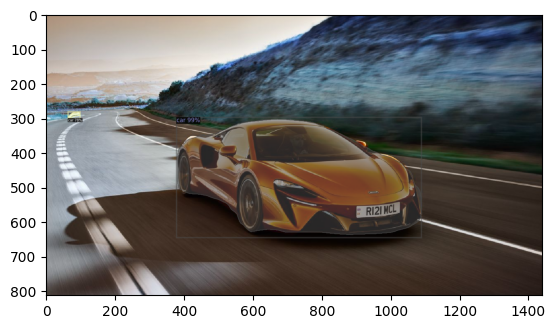

In [15]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(instances.to("cpu"))
show_image(out.get_image()[:, :, ::-1])